In [43]:
#Setup
import pandas as pd
from pathlib import Path
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [44]:
#Load Files
NSCLC_path = Path("resources/nsclc_tcga_broad_2016_clinical_data.tsv")

In [45]:
#Read Files
NSCLC = pd.read_csv(NSCLC_path, sep='\t')

In [46]:
#Make DataFrame 
NSCLC_df = pd.DataFrame(NSCLC)
NSCLC_df

,Study ID,Patient ID,Sample ID,Diagnosis Age,Age At Surgery,Cancer Type,Cancer Type Detailed,Death from Initial Pathologic Diagnosis Date,Days to Last Followup,Fraction Genome Altered,...,Overall Survival (Months),Overall Survival Status,Number of Samples Per Patient,Sex,Smoking History,Person Cigarette Smoking History Pack Year Value,Somatic Status,Stage,TMB (nonsynonymous),T Stage
0,nsclc_tcga_broad_2016,LUAD-2GUGK,LUAD-2GUGK-Tumor,NaN,68.0,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NaN,NaN,0.0174,...,NaN,NaN,1,Female,"Current Reformed Smoker, Duration Not Specified",30.00,Matched,IIA,7.933333,NaN
1,nsclc_tcga_broad_2016,LUAD-5O6B5,LUAD-5O6B5-Tumor,NaN,56.0,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NaN,NaN,0.0356,...,NaN,NaN,1,Female,Lifelong Non-Smoker,0.00,Matched,IB,1.033333,NaN
2,nsclc_tcga_broad_2016,LUAD-5V8LT,LUAD-5V8LT-Tumor,NaN,52.0,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NaN,NaN,0.3895,...,NaN,NaN,1,Male,"Current Reformed Smoker, Duration Not Specified",6.00,Matched,IB,49.433333,NaN
3,nsclc_tcga_broad_2016,LUAD-74TBW,LUAD-74TBW-Tumor,NaN,73.0,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NaN,NaN,0.1757,...,NaN,NaN,1,Male,"Current Reformed Smoker, Duration Not Specified",61.25,Matched,IB,7.800000,NaN
4,nsclc_tcga_broad_2016,LUAD-AEIUF,LUAD-AEIUF-Tumor,NaN,60.0,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NaN,NaN,0.1942,...,NaN,NaN,1,Female,"Current Reformed Smoker, Duration Not Specified",73.50,Matched,NaN,5.333333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,nsclc_tcga_broad_2016,TCGA-O2-A52V,TCGA-O2-A52V-01,75.0,NaN,Non-Small Cell Lung Cancer,Lung Squamous Cell Carcinoma,1335.0,NaN,0.2382,...,43.91,1:DECEASED,1,Female,Current Reformed Smoker For < Or = 15 Years,1.00,Matched,II,7.033333,T3
1140,nsclc_tcga_broad_2016,TCGA-O2-A52W,TCGA-O2-A52W-01,63.0,NaN,Non-Small Cell Lung Cancer,Lung Squamous Cell Carcinoma,261.0,NaN,0.5420,...,8.59,1:DECEASED,1,Male,Current Reformed Smoker For < Or = 15 Years,2.50,Matched,I,3.400000,T2
1141,nsclc_tcga_broad_2016,TCGA-O2-A5IB,TCGA-O2-A5IB-01,71.0,NaN,Non-Small Cell Lung Cancer,Lung Squamous Cell Carcinoma,340.0,NaN,0.4405,...,11.18,1:DECEASED,1,Female,Current Reformed Smoker For < Or = 15 Years,2.50,Matched,III,7.200000,T3
1142,nsclc_tcga_broad_2016,TCGA-S2-AA1A,TCGA-S2-AA1A-01,68.0,NaN,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NaN,121.0,0.0598,...,4.00,0:LIVING,1,Female,Current Reformed Smoker For > 15 Years,95.00,Matched,IA,3.633333,T1b


# Smoker History

## Data Cleaning

In [136]:
rename_NSCLC_df = NSCLC_df.rename(columns={
    'Cancer Type Detailed': 'Cancer Subtype',
    'Person Cigarette Smoking History Pack Year Value': 'Lifetime Tobacco Exposure',
})

rename_NSCLC_df.head()

,Study ID,Patient ID,Sample ID,Diagnosis Age,Age At Surgery,Cancer Type,Cancer Subtype,Death from Initial Pathologic Diagnosis Date,Days to Last Followup,Fraction Genome Altered,...,Overall Survival (Months),Overall Survival Status,Number of Samples Per Patient,Sex,Smoking History,Lifetime Tobacco Exposure,Somatic Status,Stage,TMB (nonsynonymous),T Stage
0,nsclc_tcga_broad_2016,LUAD-2GUGK,LUAD-2GUGK-Tumor,NaN,68.0,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NaN,NaN,0.0174,...,NaN,NaN,1,Female,"Current Reformed Smoker, Duration Not Specified",30.00,Matched,IIA,7.933333,NaN
1,nsclc_tcga_broad_2016,LUAD-5O6B5,LUAD-5O6B5-Tumor,NaN,56.0,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NaN,NaN,0.0356,...,NaN,NaN,1,Female,Lifelong Non-Smoker,0.00,Matched,IB,1.033333,NaN
2,nsclc_tcga_broad_2016,LUAD-5V8LT,LUAD-5V8LT-Tumor,NaN,52.0,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NaN,NaN,0.3895,...,NaN,NaN,1,Male,"Current Reformed Smoker, Duration Not Specified",6.00,Matched,IB,49.433333,NaN
3,nsclc_tcga_broad_2016,LUAD-74TBW,LUAD-74TBW-Tumor,NaN,73.0,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NaN,NaN,0.1757,...,NaN,NaN,1,Male,"Current Reformed Smoker, Duration Not Specified",61.25,Matched,IB,7.800000,NaN
4,nsclc_tcga_broad_2016,LUAD-AEIUF,LUAD-AEIUF-Tumor,NaN,60.0,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NaN,NaN,0.1942,...,NaN,NaN,1,Female,"Current Reformed Smoker, Duration Not Specified",73.50,Matched,NaN,5.333333,NaN


In [137]:
columns_to_keep = ['Patient ID', 'Cancer Subtype', 'Overall Survival (Months)', 'Smoking History']


smoker_NSCLC_df = rename_NSCLC_df[columns_to_keep]


smoker_NSCLC_df.head()


,Patient ID,Cancer Subtype,Overall Survival (Months),Smoking History
0,LUAD-2GUGK,Lung Adenocarcinoma,NaN,"Current Reformed Smoker, Duration Not Specified"
1,LUAD-5O6B5,Lung Adenocarcinoma,NaN,Lifelong Non-Smoker
2,LUAD-5V8LT,Lung Adenocarcinoma,NaN,"Current Reformed Smoker, Duration Not Specified"
3,LUAD-74TBW,Lung Adenocarcinoma,NaN,"Current Reformed Smoker, Duration Not Specified"
4,LUAD-AEIUF,Lung Adenocarcinoma,NaN,"Current Reformed Smoker, Duration Not Specified"


In [138]:
clean_smoker_NSCLC_df = smoker_NSCLC_df.dropna()

clean_smoker_NSCLC_df


,Patient ID,Cancer Subtype,Overall Survival (Months),Smoking History
159,TCGA-05-4244,Lung Adenocarcinoma,0.00,Current Reformed Smoker For < Or = 15 Years
160,TCGA-05-4249,Lung Adenocarcinoma,38.10,Current Reformed Smoker For > 15 Years
161,TCGA-05-4250,Lung Adenocarcinoma,4.00,Current Reformed Smoker For < Or = 15 Years
162,TCGA-05-4382,Lung Adenocarcinoma,20.00,Current Reformed Smoker For < Or = 15 Years
163,TCGA-05-4384,Lung Adenocarcinoma,14.00,Current Reformed Smoker For > 15 Years
...,...,...,...,...
1139,TCGA-O2-A52V,Lung Squamous Cell Carcinoma,43.91,Current Reformed Smoker For < Or = 15 Years
1140,TCGA-O2-A52W,Lung Squamous Cell Carcinoma,8.59,Current Reformed Smoker For < Or = 15 Years
1141,TCGA-O2-A5IB,Lung Squamous Cell Carcinoma,11.18,Current Reformed Smoker For < Or = 15 Years
1142,TCGA-S2-AA1A,Lung Adenocarcinoma,4.00,Current Reformed Smoker For > 15 Years


In [159]:
patientID_NSCLC_df = clean_smoker_NSCLC_df.groupby(['Smoking History', 'Cancer Subtype'])['Patient ID'].nunique().reset_index()
patientID_NSCLC_df



,Smoking History,Cancer Subtype,Patient ID
0,Current Reformed Smoker For < Or = 15 Years,Lung Adenocarcinoma,163
1,Current Reformed Smoker For < Or = 15 Years,Lung Squamous Cell Carcinoma,234
2,Current Reformed Smoker For > 15 Years,Lung Adenocarcinoma,123
3,Current Reformed Smoker For > 15 Years,Lung Squamous Cell Carcinoma,80
4,"Current Reformed Smoker, Duration Not Specified",Lung Adenocarcinoma,4
5,"Current Reformed Smoker, Duration Not Specified",Lung Squamous Cell Carcinoma,5
6,Current Smoker,Lung Adenocarcinoma,110
7,Current Smoker,Lung Squamous Cell Carcinoma,127
8,Lifelong Non-Smoker,Lung Adenocarcinoma,67
9,Lifelong Non-Smoker,Lung Squamous Cell Carcinoma,18


## Plots

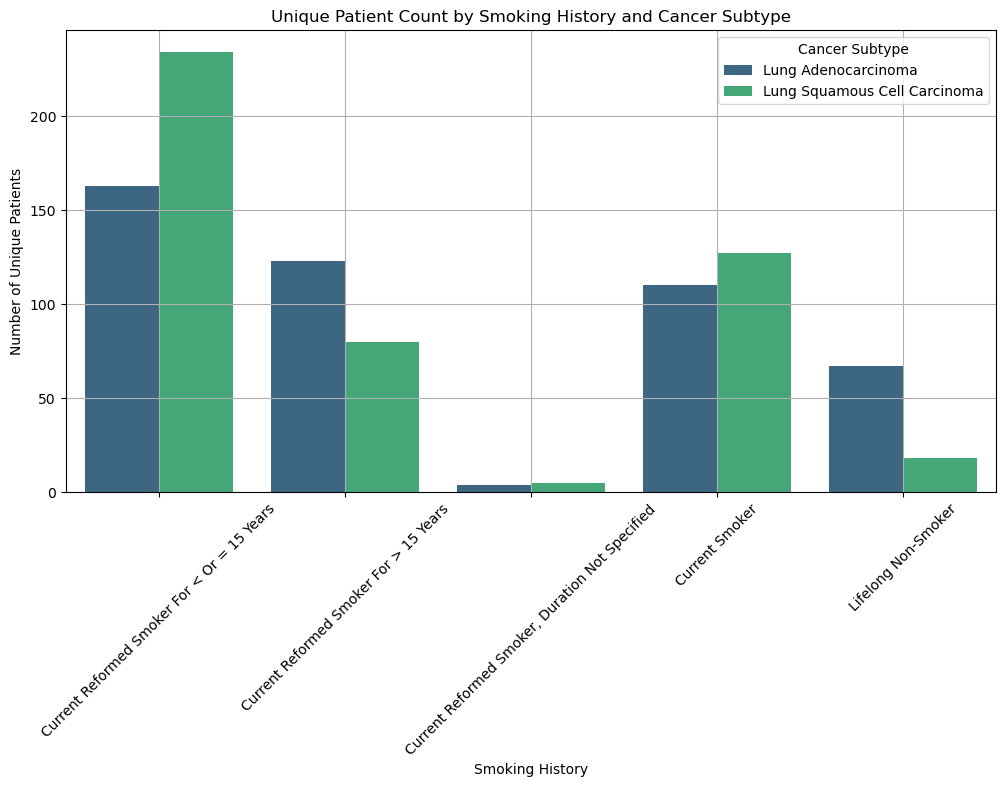

In [160]:

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot with the counts of unique patients
sns.barplot(data=patientID_NSCLC_df, 
            x='Smoking History', 
            y='Patient ID', 
            hue='Cancer Subtype', 
            palette='viridis')

# Add title and labels
plt.title('Unique Patient Count by Smoking History and Cancer Subtype')
plt.xlabel('Smoking History')
plt.ylabel('Number of Unique Patients')
plt.xticks(rotation=45)

# Show the legend
plt.legend(title='Cancer Subtype')
plt.grid()
plt.show()  

In [163]:
smoker_tukey_results = pairwise_tukeyhsd(endog=patientID_NSCLC_df['Patient ID'],
                                          groups=patientID_NSCLC_df['Smoking History'],
                                          alpha=0.05)

# Print the results
print(smoker_tukey_results)

                                           Multiple Comparison of Means - Tukey HSD, FWER=0.05                                           
                     group1                                          group2                     meandiff p-adj    lower    upper   reject
-----------------------------------------------------------------------------------------------------------------------------------------
    Current Reformed Smoker For < Or = 15 Years          Current Reformed Smoker For > 15 Years    -97.0 0.1181 -221.1689  27.1689  False
    Current Reformed Smoker For < Or = 15 Years Current Reformed Smoker, Duration Not Specified   -194.0  0.008 -318.1689 -69.8311   True
    Current Reformed Smoker For < Or = 15 Years                                  Current Smoker    -80.0 0.2085 -204.1689  44.1689  False
    Current Reformed Smoker For < Or = 15 Years                             Lifelong Non-Smoker   -156.0 0.0203 -280.1689 -31.8311   True
         Current Reformed Smoker F

In [162]:
print(adenocarcinoma_counts['Smoking History'].value_counts())


Smoking History
Current Reformed Smoker For < Or = 15 Years    1
Current Reformed Smoker For > 15 Years         1
Current Smoker                                 1
Lifelong Non-Smoker                            1
Name: count, dtype: int64


In [ ]:
Lung Squamous Cell Carcinoma

In [153]:
data = {
    'Smoking History': [
        'Current Reformed Smoker For < Or = 15 Years',
        'Current Reformed Smoker For > 15 Years',
        'Current Smoker',
        'Lifelong Non-Smoker'
    ],
    'Unique Patient Count': [163, 123, 110, 67]
}

adenocarcinoma_countss = pd.DataFrame(data)

# Prepare data for Tukey's test
tukey_data = []
for _, row in adenocarcinoma_countss.iterrows():
    for _ in range(int(row['Unique Patient Count'])):
        tukey_data.append({'Smoking History': row['Smoking History'], 'Patient ID': row['Unique Patient Count']})

tukey_df = pd.DataFrame(tukey_data)

# Perform Tukey's HSD test
smoker_tukey_results = pairwise_tukeyhsd(endog=tukey_df['Patient ID'],
                                          groups=tukey_df['Smoking History'],
                                          alpha=0.05)

# Print the results
print(smoker_tukey_results)

C:\Users\nefer\anaconda3_2\Lib\site-packages\statsmodels\sandbox\stats\multicomp.py:1300: RuntimeWarning: divide by zero encountered in divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic


                                Multiple Comparison of Means - Tukey HSD, FWER=0.05                                 
                   group1                                   group2                 meandiff p-adj lower upper reject
--------------------------------------------------------------------------------------------------------------------
Current Reformed Smoker For < Or = 15 Years Current Reformed Smoker For > 15 Years    -40.0   0.0 -40.0 -40.0   True
Current Reformed Smoker For < Or = 15 Years                         Current Smoker    -53.0   0.0 -53.0 -53.0   True
Current Reformed Smoker For < Or = 15 Years                    Lifelong Non-Smoker    -96.0   0.0 -96.0 -96.0   True
     Current Reformed Smoker For > 15 Years                         Current Smoker    -13.0   0.0 -13.0 -13.0   True
     Current Reformed Smoker For > 15 Years                    Lifelong Non-Smoker    -56.0   0.0 -56.0 -56.0   True
                             Current Smoker                    L

AttributeError: 'dict' object has no attribute 'dtypes'

# Diagnosis Age

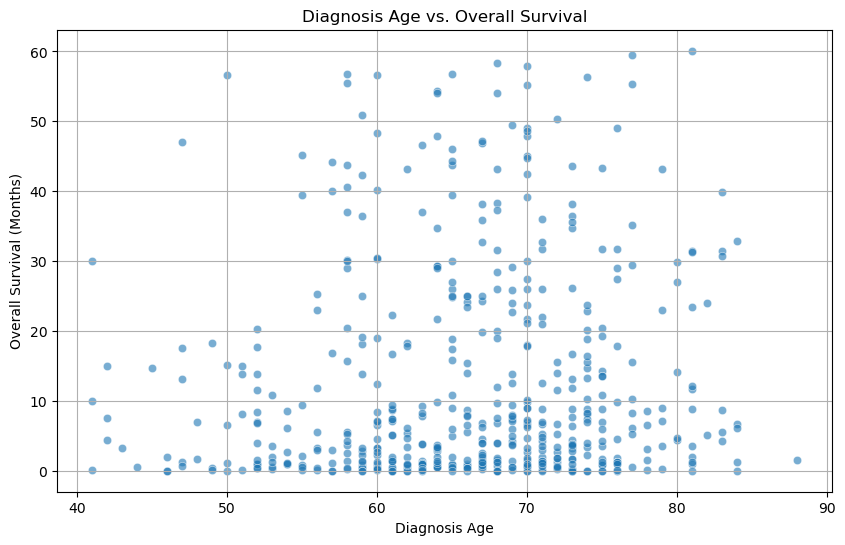

In [55]:
# Step 1: Identify outliers for 'Diagnosis Age'
Q1_age = clean_NSCLC_df['Diagnosis Age'].quantile(0.25)
Q3_age = clean_NSCLC_df['Diagnosis Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Define bounds for 'Diagnosis Age'
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Step 1: Identify outliers for 'Overall Survival (Months)'
Q1_survival = clean_NSCLC_df['Overall Survival (Months)'].quantile(0.25)
Q3_survival = clean_NSCLC_df['Overall Survival (Months)'].quantile(0.75)
IQR_survival = Q3_survival - Q1_survival

# Define bounds for 'Overall Survival (Months)'
lower_bound_survival = Q1_survival - 1.5 * IQR_survival
upper_bound_survival = Q3_survival + 1.5 * IQR_survival

# Step 2: Filter out outliers
Age_NSCLC_df = clean_NSCLC_df[
    (clean_NSCLC_df['Diagnosis Age'] >= lower_bound_age) & (clean_NSCLC_df['Diagnosis Age'] <= upper_bound_age) &
    (clean_NSCLC_df['Overall Survival (Months)'] >= lower_bound_survival) & (clean_NSCLC_df['Overall Survival (Months)'] <= upper_bound_survival)
]

# Step 3: Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Age_NSCLC_df, x='Diagnosis Age', y='Overall Survival (Months)', alpha=0.6)
plt.title('Diagnosis Age vs. Overall Survival')
plt.xlabel('Diagnosis Age')
plt.ylabel('Overall Survival (Months)')
plt.grid()
plt.show()


# Cancer Subtype

In [ ]:
columns_to_keep = ['Patient ID', 'Cancer Subtype', 'Overall Survival (Months)', 'Smoking History']


smoker_NSCLC_df = rename_NSCLC_df[columns_to_keep]


smoker_NSCLC_df.head()

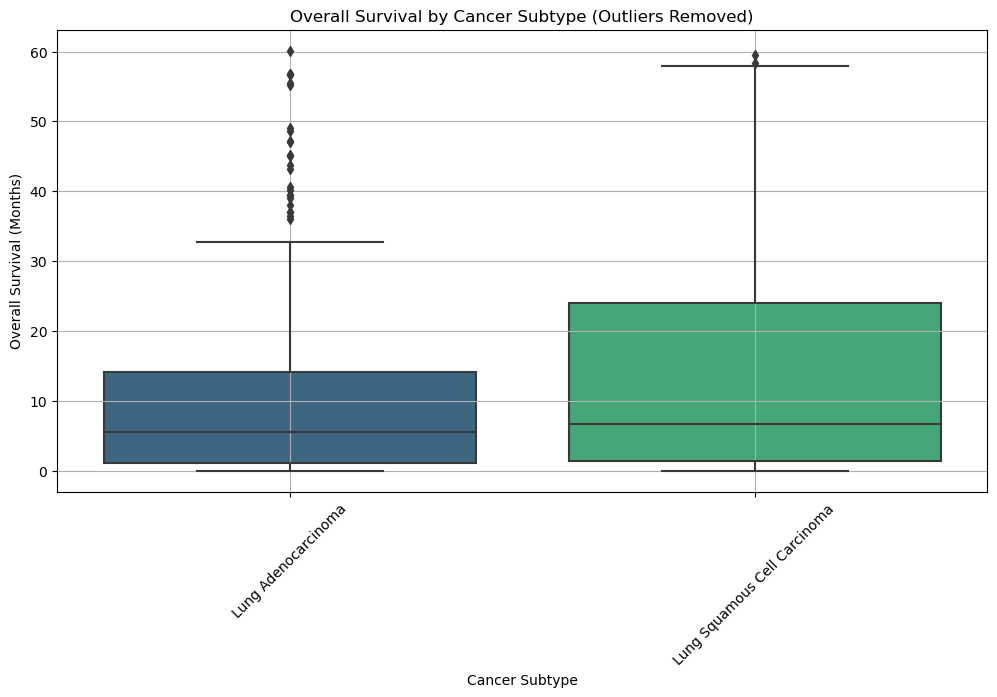

In [57]:
#Filter Ouliers
subtype_NSCLC_df = clean_NSCLC_df[
    (clean_NSCLC_df['Overall Survival (Months)'] >= lower_bound_survival) & 
    (clean_NSCLC_df['Overall Survival (Months)'] <= upper_bound_survival)
]

# Step 3: Create the box plot using the cleaned DataFrame
plt.figure(figsize=(12, 6))
sns.boxplot(data=subtype_NSCLC_df, x='Cancer Subtype', y='Overall Survival (Months)', palette='viridis')

# Add title and labels
plt.title('Overall Survival by Cancer Subtype (Outliers Removed)')
plt.xlabel('Cancer Subtype')
plt.ylabel('Overall Survival (Months)')
plt.xticks(rotation=45)

# Show the plot
plt.grid()
plt.show()

In [64]:
# Define the model
subtype_model = ols('Q("Overall Survival (Months)") ~ Q("Cancer Subtype")', data=subtype_NSCLC_df).fit()

# Perform ANOVA
subtype_anova_results = anova_lm(subtype_model)

# Print the ANOVA results
print(subtype_anova_results)

                        df         sum_sq      mean_sq         F    PR(>F)
Q("Cancer Subtype")    1.0    1191.493701  1191.493701  5.209878  0.022858
Residual             525.0  120066.956624   228.698965       NaN       NaN


In [67]:
# Perform Tukey's HSD test
subtype_tukey_results = pairwise_tukeyhsd(endog=subtype_NSCLC_df['Overall Survival (Months)'],
                                   groups=subtype_NSCLC_df['Cancer Subtype'],
                                   alpha=0.05)

# Print the results
print(subtype_tukey_results)

                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
       group1                  group2            meandiff p-adj  lower  upper  reject
-------------------------------------------------------------------------------------
Lung Adenocarcinoma Lung Squamous Cell Carcinoma   3.0164 0.0229 0.4203 5.6125   True
-------------------------------------------------------------------------------------


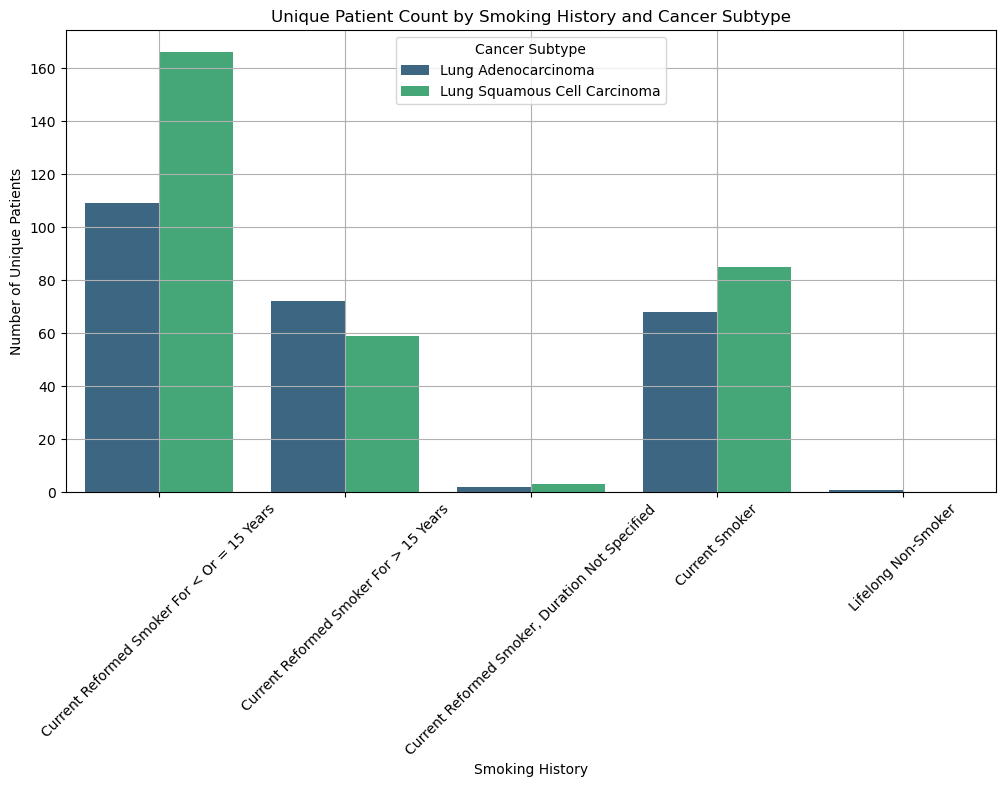

In [68]:

patientID_counts = clean_NSCLC_df.groupby(['Smoking History', 'Cancer Subtype'])['Patient ID'].nunique().reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot with the counts of unique patients
sns.barplot(data=patientID_counts, 
            x='Smoking History', 
            y='Patient ID', 
            hue='Cancer Subtype', 
            palette='viridis')

# Add title and labels
plt.title('Unique Patient Count by Smoking History and Cancer Subtype')
plt.xlabel('Smoking History')
plt.ylabel('Number of Unique Patients')
plt.xticks(rotation=45)

# Show the legend
plt.legend(title='Cancer Subtype')
plt.grid()
plt.show()

In [72]:
# Step 1: Group by 'Smoking History' and 'Cancer Subtype' to count unique Patient IDs
patient_counts = clean_NSCLC_df.groupby(['Smoking History', 'Cancer Subtype'])['Patient ID'].nunique().reset_index()

# Step 2: Create a pivot table to reshape the data
pivot_table = patient_counts.pivot(index='Smoking History', 
                                    columns='Cancer Subtype', 
                                    values='Patient ID')

# Step 3: Reset index to make it a DataFrame
pivot_table.reset_index(inplace=True)

# Fill NaN values with 0 (if needed)
pivot_table.fillna(0, inplace=True)

# Display the final table
pivot_table

Cancer Subtype,Smoking History,Lung Adenocarcinoma,Lung Squamous Cell Carcinoma
0,Current Reformed Smoker For < Or = 15 Years,109.0,166.0
1,Current Reformed Smoker For > 15 Years,72.0,59.0
2,"Current Reformed Smoker, Duration Not Specified",2.0,3.0
3,Current Smoker,68.0,85.0
4,Lifelong Non-Smoker,1.0,0.0


In [73]:
# Count unique Patient IDs where Smoking History indicates non-smokers
non_smoker_count = clean_NSCLC_df[clean_NSCLC_df['Smoking History'] == 'Lifelong Non-Smoker']['Patient ID'].nunique()

# Print the count of non-smokers
print(f'Number of non-smokers: {non_smoker_count}')

Number of non-smokers: 1


# Genome Altered

In [165]:
columns_to_keep = ['Patient ID', 'Cancer Subtype', 'Overall Survival (Months)', 'Fraction Genome Altered']


genome_NSCLC_df = rename_NSCLC_df[columns_to_keep]


genome_NSCLC_df.head()

,Patient ID,Cancer Subtype,Overall Survival (Months),Fraction Genome Altered
0,LUAD-2GUGK,Lung Adenocarcinoma,NaN,0.0174
1,LUAD-5O6B5,Lung Adenocarcinoma,NaN,0.0356
2,LUAD-5V8LT,Lung Adenocarcinoma,NaN,0.3895
3,LUAD-74TBW,Lung Adenocarcinoma,NaN,0.1757
4,LUAD-AEIUF,Lung Adenocarcinoma,NaN,0.1942


In [166]:
genome_NSCLC_df.dropna()

,Patient ID,Cancer Subtype,Overall Survival (Months),Fraction Genome Altered
159,TCGA-05-4244,Lung Adenocarcinoma,0.00,0.4565
160,TCGA-05-4249,Lung Adenocarcinoma,38.10,0.2221
161,TCGA-05-4250,Lung Adenocarcinoma,4.00,0.2362
162,TCGA-05-4382,Lung Adenocarcinoma,20.00,0.0854
163,TCGA-05-4384,Lung Adenocarcinoma,14.00,0.0661
...,...,...,...,...
1139,TCGA-O2-A52V,Lung Squamous Cell Carcinoma,43.91,0.2382
1140,TCGA-O2-A52W,Lung Squamous Cell Carcinoma,8.59,0.5420
1141,TCGA-O2-A5IB,Lung Squamous Cell Carcinoma,11.18,0.4405
1142,TCGA-S2-AA1A,Lung Adenocarcinoma,4.00,0.0598


C:\Users\nefer\AppData\Local\Temp\ipykernel_22584\869807633.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genome_NSCLC_df['Genome Altered Bin'] = pd.cut(genome_NSCLC_df['Fraction Genome Altered'], bins=bins, labels=labels)
C:\Users\nefer\AppData\Local\Temp\ipykernel_22584\869807633.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_survival_by_bin = genome_NSCLC_df.groupby(['Cancer Subtype', 'Genome Altered Bin'])['Overall Survival (Months)'].mean().reset_index()


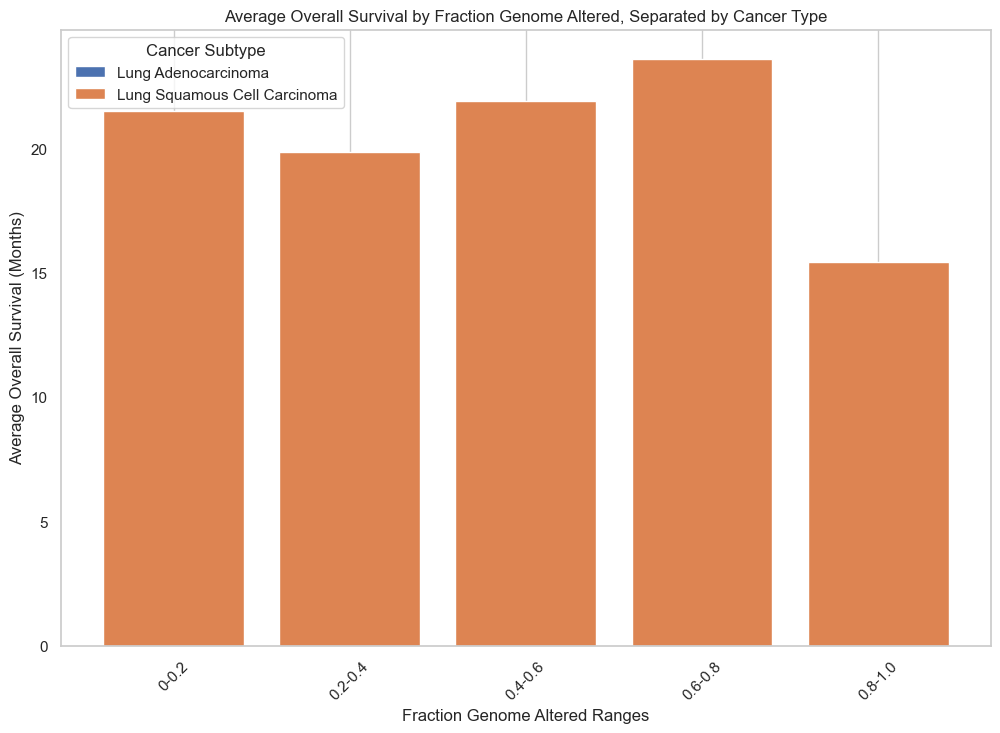

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame creation (use your actual genome_NSCLC_df)
# genome_NSCLC_df = rename_NSCLC_df[columns_to_keep]

# Define the bins and labels
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']

# Create a new column for the binned data
genome_NSCLC_df['Genome Altered Bin'] = pd.cut(genome_NSCLC_df['Fraction Genome Altered'], bins=bins, labels=labels)

# Calculate the average overall survival for each bin, separated by cancer subtype
avg_survival_by_bin = genome_NSCLC_df.groupby(['Cancer Subtype', 'Genome Altered Bin'])['Overall Survival (Months)'].mean().reset_index()

# Plotting
cancer_types = avg_survival_by_bin['Cancer Subtype'].unique()

plt.figure(figsize=(12, 8))

for cancer_type in cancer_types:
    subset = avg_survival_by_bin[avg_survival_by_bin['Cancer Subtype'] == cancer_type]
    
    plt.bar(subset['Genome Altered Bin'], subset['Overall Survival (Months)'], label=cancer_type)

plt.xlabel('Fraction Genome Altered Ranges')
plt.ylabel('Average Overall Survival (Months)')
plt.title('Average Overall Survival by Fraction Genome Altered, Separated by Cancer Type')
plt.xticks(rotation=45)
plt.legend(title='Cancer Subtype')
plt.grid(axis='y')
plt.show()


# Binned Overall Survival

In [209]:
columns_to_keep = ['Patient ID', 'Cancer Subtype', 'Overall Survival (Months)', 'Mutation Count']


survival_NSCLC_df = rename_NSCLC_df[columns_to_keep]

survival_NSCLC_df.head()

,Patient ID,Cancer Subtype,Overall Survival (Months),TMB (nonsynonymous)
0,LUAD-2GUGK,Lung Adenocarcinoma,NaN,7.933333
1,LUAD-5O6B5,Lung Adenocarcinoma,NaN,1.033333
2,LUAD-5V8LT,Lung Adenocarcinoma,NaN,49.433333
3,LUAD-74TBW,Lung Adenocarcinoma,NaN,7.800000
4,LUAD-AEIUF,Lung Adenocarcinoma,NaN,5.333333


In [210]:
survival_NSCLC_df.dropna()

,Patient ID,Cancer Subtype,Overall Survival (Months),TMB (nonsynonymous)
159,TCGA-05-4244,Lung Adenocarcinoma,0.00,6.300000
160,TCGA-05-4249,Lung Adenocarcinoma,38.10,9.633333
161,TCGA-05-4250,Lung Adenocarcinoma,4.00,9.833333
162,TCGA-05-4382,Lung Adenocarcinoma,20.00,54.233333
163,TCGA-05-4384,Lung Adenocarcinoma,14.00,4.066667
...,...,...,...,...
1139,TCGA-O2-A52V,Lung Squamous Cell Carcinoma,43.91,7.033333
1140,TCGA-O2-A52W,Lung Squamous Cell Carcinoma,8.59,3.400000
1141,TCGA-O2-A5IB,Lung Squamous Cell Carcinoma,11.18,7.200000
1142,TCGA-S2-AA1A,Lung Adenocarcinoma,4.00,3.633333


In [211]:
bins = list(range(0, 126, 6))  # Create bins from 0 to 120 in increments of 6
labels = [f'{i}-{i + 6}' for i in bins[:-1]]  # Create labels for the bins

# Create a new column for binned survival months
survival_NSCLC_df['Survival Binned'] = pd.cut(survival_NSCLC_df['Overall Survival (Months)'], bins=bins, labels=labels, right=False)

# Group by the binned survival months and count unique Patient IDs
counts_survival_NSCLC_df = survival_NSCLC_df.groupby('Survival Binned')['Patient ID'].nunique().reset_index()

# Rename the count column for clarity
counts_survival_NSCLC_df.columns = ['Survival Binned', 'Unique Patient Count']

# Display the result
print(counts_survival_NSCLC_df)

   Survival Binned  Unique Patient Count
0              0-6                   412
1             6-12                   138
2            12-18                    77
3            18-24                    57
4            24-30                    51
5            30-36                    42
6            36-42                    36
7            42-48                    31
8            48-54                    18
9            54-60                    24
10           60-66                    12
11           66-72                    13
12           72-78                     6
13           78-84                     6
14           84-90                     5
15           90-96                     3
16          96-102                     3
17         102-108                     4
18         108-114                     2
19         114-120                     5


C:\Users\nefer\AppData\Local\Temp\ipykernel_22584\1955539948.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survival_NSCLC_df['Survival Binned'] = pd.cut(survival_NSCLC_df['Overall Survival (Months)'], bins=bins, labels=labels, right=False)
C:\Users\nefer\AppData\Local\Temp\ipykernel_22584\1955539948.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_survival_NSCLC_df = survival_NSCLC_df.groupby('Survival Binned')['Patient ID'].nunique().reset_index()


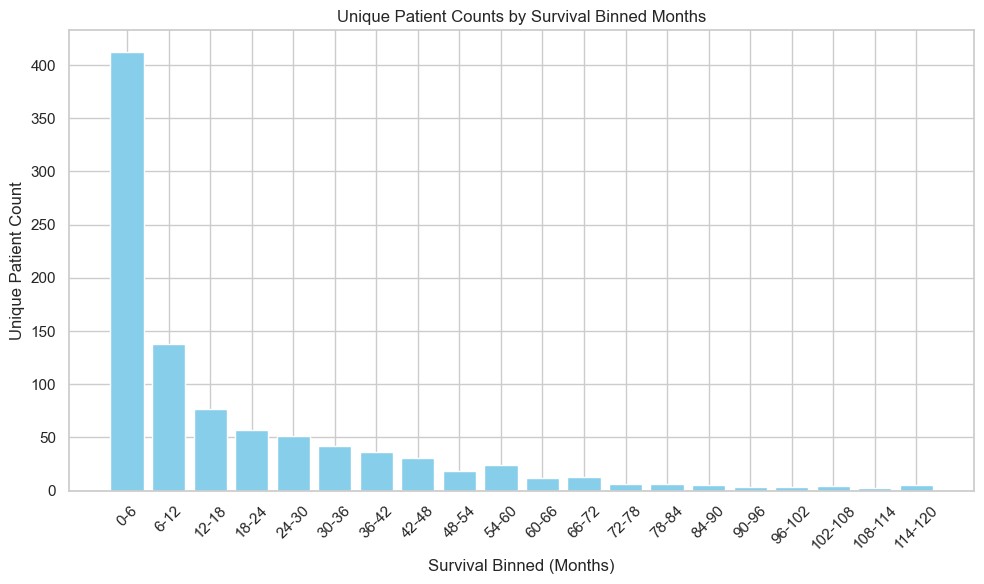

In [212]:
plt.figure(figsize=(10, 6))
plt.bar(counts_survival_NSCLC_df['Survival Binned'], counts_survival_NSCLC_df['Unique Patient Count'], color='skyblue')

# Adding titles and labels
plt.title('Unique Patient Counts by Survival Binned Months')
plt.xlabel('Survival Binned (Months)')
plt.ylabel('Unique Patient Count')

# Rotating x-tick labels for better readability
plt.xticks(rotation=45)

# Display the bar graph
plt.tight_layout()
plt.show()

In [213]:
# Assuming survival_NSCLC_df has a 'Fraction Genome Altered' column
average_genome_df = survival_NSCLC_df.groupby('Survival Binned')['TMB (nonsynonymous)'].mean().reset_index()

# Rename the columns for clarity
average_genome_df.columns = ['Survival Binned', 'TMB (nonsynonymous)']


C:\Users\nefer\AppData\Local\Temp\ipykernel_22584\2194433433.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_genome_df = survival_NSCLC_df.groupby('Survival Binned')['TMB (nonsynonymous)'].mean().reset_index()


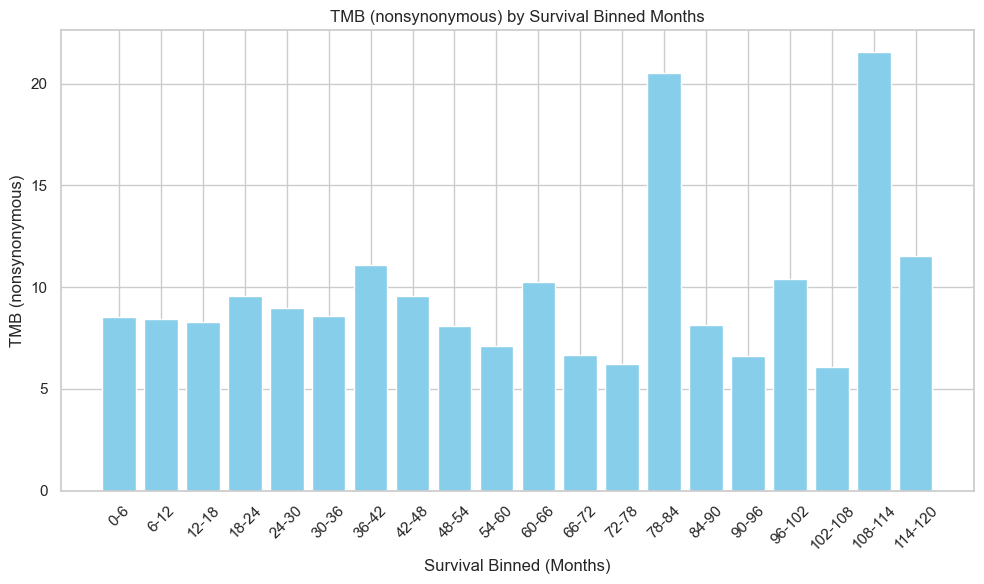

In [214]:
plt.figure(figsize=(10, 6))
plt.bar(average_genome_df['Survival Binned'], average_genome_df['TMB (nonsynonymous)'], color='skyblue')

# Adding titles and labels
plt.title('TMB (nonsynonymous) by Survival Binned Months')
plt.xlabel('Survival Binned (Months)')
plt.ylabel('TMB (nonsynonymous)')

# Rotating x-tick labels for better readability
plt.xticks(rotation=45)

# Display the bar graph
plt.tight_layout()
plt.show()


C:\Users\nefer\anaconda3_2\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


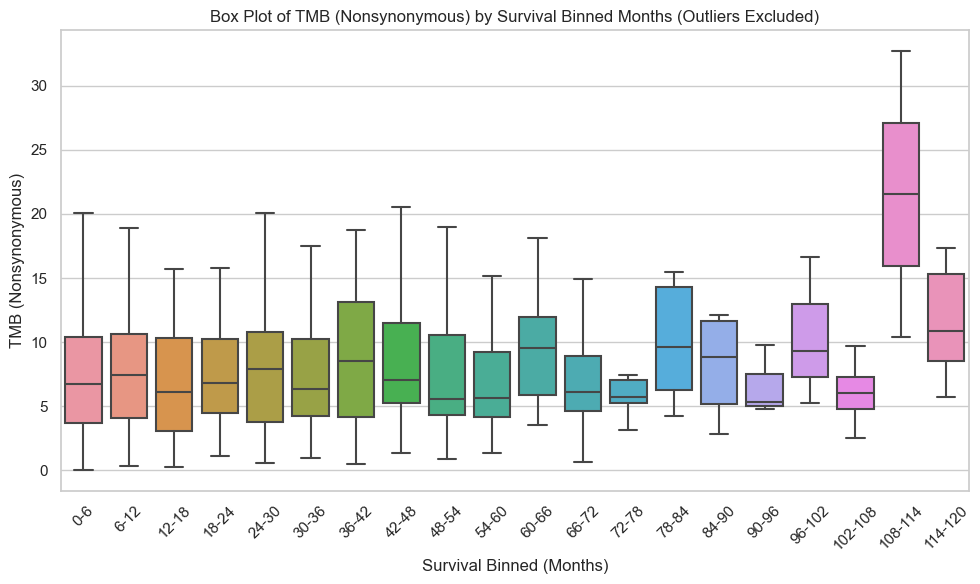

In [218]:
plt.figure(figsize=(10, 6))

# Create a box plot without outliers
sns.boxplot(data=survival_NSCLC_df, x='Survival Binned', y='TMB (nonsynonymous)', showfliers=False)

# Adding titles and labels
plt.title('Box Plot of TMB (Nonsynonymous) by Survival Binned Months (Outliers Excluded)')
plt.xlabel('Survival Binned (Months)')
plt.ylabel('TMB (Nonsynonymous)')

# Rotating x-tick labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()